In [1]:
#Importing relevant functions
import statsmodels.api as sm
import statsmodels as sms
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
%matplotlib inline

In [2]:
!pip install wooldridge

# I. Panel Data Models

In [3]:
import wooldridge as woo
data1 = woo.data('KIELMC')

In [4]:
data1 = pd.DataFrame(data1)
data1


,year,age,agesq,nbh,cbd,intst,lintst,price,rooms,area,...,lprice,y81,larea,lland,y81ldist,lintstsq,nearinc,y81nrinc,rprice,lrprice
0,1978,48,2304.0,4,3000.0,1000.0,6.9078,60000.0,7,1660,...,11.002100,0,7.414573,8.429017,0.000000,47.717705,1,0,60000.000000,11.002100
1,1978,83,6889.0,4,4000.0,1000.0,6.9078,40000.0,6,2612,...,10.596635,0,7.867871,9.032409,0.000000,47.717705,1,0,40000.000000,10.596635
2,1978,58,3364.0,4,4000.0,1000.0,6.9078,34000.0,6,1144,...,10.434115,0,7.042286,8.517193,0.000000,47.717705,1,0,34000.000000,10.434115
3,1978,11,121.0,4,4000.0,1000.0,6.9078,63900.0,5,1136,...,11.065075,0,7.035269,9.210340,0.000000,47.717705,1,0,63900.000000,11.065075
4,1978,48,2304.0,4,4000.0,2000.0,7.6009,44000.0,5,1868,...,10.691945,0,7.532624,9.210340,0.000000,57.773682,1,0,44000.000000,10.691945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,1981,25,625.0,0,10000.0,10000.0,9.2103,60000.0,6,1388,...,11.002100,1,7.235619,8.922658,9.735069,84.829636,0,0,46082.949219,10.738198
317,1981,0,0.0,6,24000.0,26000.0,10.1660,144500.0,7,3140,...,11.881035,1,8.051978,10.795219,10.126630,103.347565,0,0,110983.101562,11.617133
318,1981,20,400.0,0,15000.0,15000.0,9.6158,97000.0,6,1296,...,11.482467,1,7.167038,10.711458,9.966462,92.463608,0,0,74500.765625,11.218565
319,1981,19,361.0,0,14000.0,15000.0,9.6158,95000.0,5,1148,...,11.461632,1,7.045776,10.696073,9.928180,92.463608,0,0,72964.671875,11.197731


In [5]:
#Dropping log columns to clean the model

df_0= data1.drop(['lintst', 'lprice', 'ldist','larea','lland','rprice','lrprice'], axis=1)
df_0.head()

,year,age,agesq,nbh,cbd,intst,price,rooms,area,land,baths,dist,wind,y81,y81ldist,lintstsq,nearinc,y81nrinc
0,1978,48,2304.0,4,3000.0,1000.0,60000.0,7,1660,4578.0,1,10700.0,3,0,0.0,47.717705,1,0
1,1978,83,6889.0,4,4000.0,1000.0,40000.0,6,2612,8370.0,2,11000.0,3,0,0.0,47.717705,1,0
2,1978,58,3364.0,4,4000.0,1000.0,34000.0,6,1144,5000.0,1,11500.0,3,0,0.0,47.717705,1,0
3,1978,11,121.0,4,4000.0,1000.0,63900.0,5,1136,10000.0,1,11900.0,3,0,0.0,47.717705,1,0
4,1978,48,2304.0,4,4000.0,2000.0,44000.0,5,1868,10000.0,1,12100.0,3,0,0.0,57.773682,1,0


In [6]:
selected_columns1=df_0[["year","age","agesq","nbh","cbd","intst","price","rooms","area","land","baths","dist","wind","y81","y81ldist","lintstsq","nearinc","y81nrinc"]]

/var/folders/5c/3157mbn910b2gp0sphv4k8xm0000gn/T/ipykernel_22867/2473792446.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, ax=ax, hist=True, kde=True,
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operat

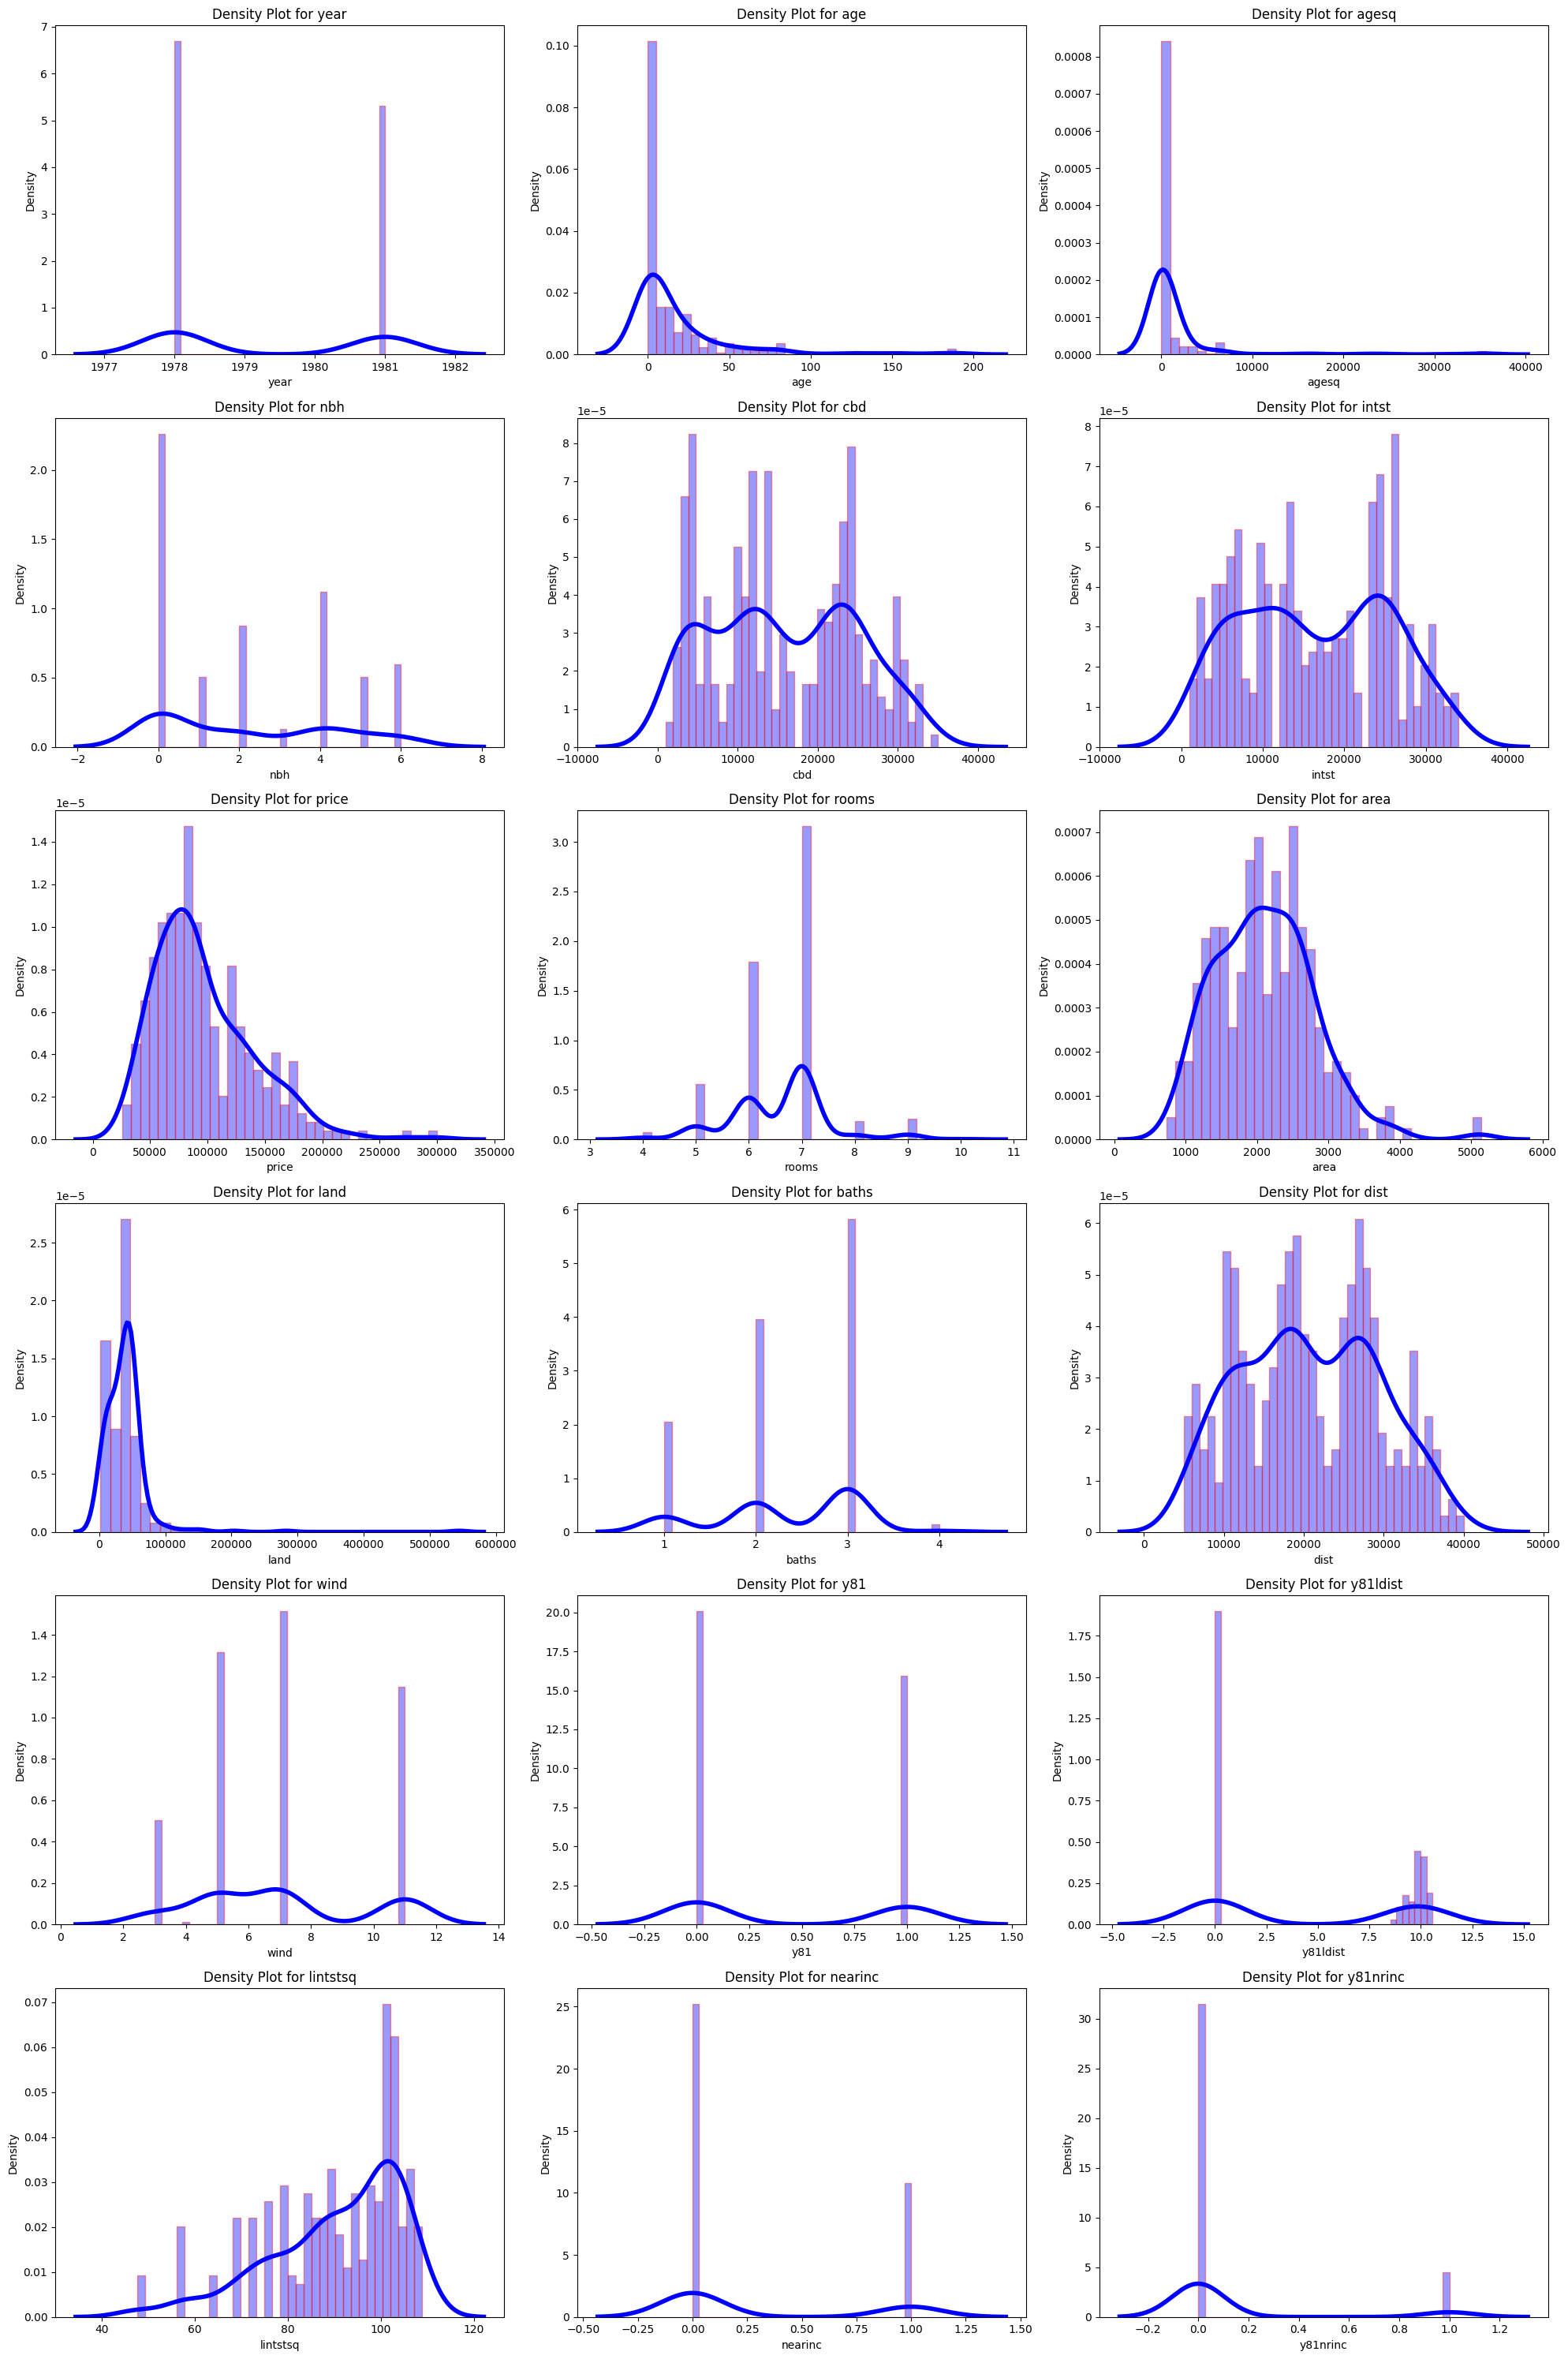

In [7]:
# Density Plots
import matplotlib.pyplot as plt
import seaborn as sns
# Create a figure with subplots for Density estimates
fig, axes = plt.subplots(6, 3, figsize=(20, 30))
axes = axes.ravel()
# Creating density plots for each variable in the selected_columns list using a for loop:
for a, b in enumerate(selected_columns1):
    ax = axes[a]
    data = selected_columns1[b]
    
# Create a density plot for the variable
    sns.distplot(data, ax=ax, hist=True, kde=True,
                 bins=int(180/5), color='blue',
                 hist_kws={'edgecolor': 'red'},
                 kde_kws={'linewidth': 4})
    ax.set_title(f'Density Plot for {b}')
    ax.set_xlabel(b)
    ax.set_ylabel('Density')
    
plt.tight_layout()
plt.show()

In [8]:
df_0['price'] = df_0['price'].astype(int)

In [9]:
df_0 = df_0.set_index(['nbh','year'],drop=False)

### Based on the dataset and variables, a possible economic model could be a price model. The model is commonly used in real estate economics to estimate the relationship between the characteristics of a house and its market price. 

# Question 3

# Pooled

In [10]:
# OLS results including interaction terms:
reg = smf.ols(formula='price ~ year+age+agesq+nbh+cbd+intst+rooms+area+land+baths+dist+wind+y81+y81ldist+lintstsq+nearinc+y81nrinc',
              data=df_0)
results = reg.fit()

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
table

,b,se,t,pval
Intercept,-210.6672,152.7619,-1.3791,0.1689
year,-25.2433,19.6602,-1.2840,0.2001
age,-792.4999,163.8350,-4.8372,0.0000
agesq,3.6117,1.0025,3.6025,0.0004
nbh,-1109.0109,806.5740,-1.3750,0.1702
cbd,0.2729,1.9522,0.1398,0.8889
intst,-1.7392,1.8808,-0.9247,0.3558
rooms,3975.0227,1924.3124,2.0657,0.0397
area,21.1383,2.6842,7.8751,0.0000
land,0.1381,0.0371,3.7242,0.0002


# Fixed Effects

In [11]:
import linearmodels as plm

In [12]:

reg_fe = plm.PanelOLS.from_formula('price~ year + age + agesq + nbh + cbd + intst + rooms + area + land + baths + dist + wind + y81 + y81ldist + lintstsq + nearinc + y81nrinc + TimeEffects', data=df_0,drop_absorbed=True)
results_fe = reg_fe.fit()

table_fe = pd.DataFrame({'b': round(results_fe.params, 4),
                         'se': round(results_fe.std_errors, 4),
                         't': round(results_fe.tstats, 4),
                         'pval': round(results_fe.pvalues, 4)})
table_fe

/var/folders/5c/3157mbn910b2gp0sphv4k8xm0000gn/T/ipykernel_22867/1432511462.py:2: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

y81

  results_fe = reg_fe.fit()


,b,se,t,pval
year,5.6917,27.5363,0.2067,0.8364
age,-792.4999,163.8350,-4.8372,0.0000
agesq,3.6117,1.0025,3.6025,0.0004
nbh,-1109.0109,806.5740,-1.3750,0.1702
cbd,0.2729,1.9522,0.1398,0.8889
intst,-1.7392,1.8808,-0.9247,0.3558
rooms,3975.0227,1924.3124,2.0657,0.0397
area,21.1383,2.6842,7.8751,0.0000
land,0.1381,0.0371,3.7242,0.0002
baths,8062.4933,2977.4431,2.7079,0.0072


# Random Effects

In [13]:
reg2 = plm.RandomEffects.from_formula(
    formula='price ~ year+age+agesq+nbh+cbd+intst+rooms+area+land+baths+dist+wind+y81+y81ldist+lintstsq+nearinc+y81nrinc', data=df_0)
results2 = reg2.fit()

In [14]:
results2

Dep. Variable:,price,R-squared:,0.7406
Estimator:,RandomEffects,R-squared (Between):,0.9368
No. Observations:,321,R-squared (Within):,0.6884
Date:,"Tue, Dec 05 2023",R-squared (Overall):,0.7406
Time:,16:52:13,Log-likelihood,-3664.8
Cov. Estimator:,Unadjusted,,
,,F-statistic:,54.254
Entities:,7,P-value,0.0000
Avg Obs:,45.857,Distribution:,"F(16,304)"
Min Obs:,7.0000,,
Max Obs:,121.00,F-statistic (robust):,54.130


# Exploring heterogeneity across time (year) and neighbourhood (nbh)

/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bharatsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

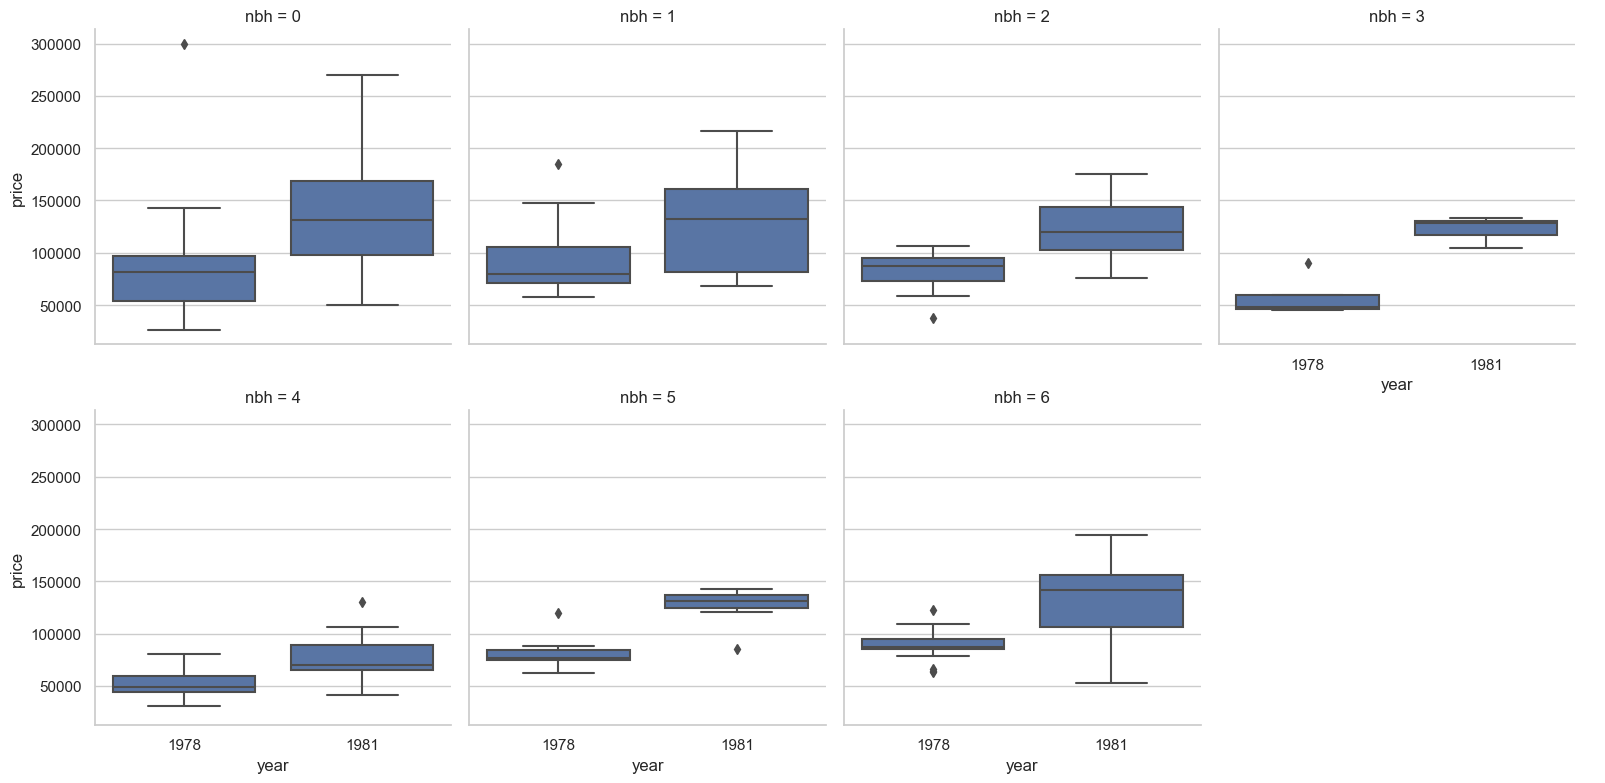

In [20]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatterplot matrix
g = sns.FacetGrid(df_0, col="nbh", col_wrap=4, height=4)
g.map(sns.boxplot, "year", "price")
g.add_legend()

# Show the plot
plt.show()

### Looking at these boxplots, we can see that there is difference in the levels in both years (1978&198) which tells us that we can leave the pooled model and analyse fixed effects as well as random effects for choosing the best model. For that, we will use the Hausman Test.

### Detailed explanation: In a boxplot, we would expect to see minimal variation in the distribution of the outcome variable across different groups. Here, this is not the case.

# Hausman Test¶

In [15]:
# estimation of FE and RE:
reg_fe = plm.PanelOLS.from_formula(formula='price~ year + age + agesq + nbh + cbd + intst + rooms + area + land + baths + dist + wind + y81 + y81ldist + lintstsq + nearinc + y81nrinc + TimeEffects', data=df_0,drop_absorbed=True)
results_fe = reg_fe.fit()
b_fe = results_fe.params
b_fe_cov = results_fe.cov

reg_re = plm.RandomEffects.from_formula(
    formula='price ~ year+age+agesq+nbh+cbd+intst+rooms+area+land+baths+dist+wind+y81+y81ldist+lintstsq+nearinc+y81nrinc', data=df_0)
results_re = reg_re.fit()
b_re = results_re.params
b_re_cov = results_re.cov

# Hausman test of FE vs. RE
# (I) find overlapping coefficients:
common_coef = list(set(results_fe.params.index).intersection(results_re.params.index))

# (II) calculate differences between FE and RE:
b_diff = np.array(results_fe.params[common_coef] - results_re.params[common_coef])
df = len(b_diff)
b_diff.reshape((df, 1))
b_cov_diff = np.array(b_fe_cov.loc[common_coef, common_coef] -
                      b_re_cov.loc[common_coef, common_coef])
b_cov_diff.reshape((df, df))

# (III) calculate test statistic:
stat = abs(np.transpose(b_diff) @ np.linalg.inv(b_cov_diff) @ b_diff)
pval = 1 - stats.chi2.cdf(stat, df)

print(f'stat: {stat}\n')
print(f'pval: {pval}\n')



stat: 7.325798463136914e-13

pval: 1.0



/var/folders/5c/3157mbn910b2gp0sphv4k8xm0000gn/T/ipykernel_22867/1853656591.py:3: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

y81

  results_fe = reg_fe.fit()


### The Hausman test statistic is approximately 7.33×10−137.33×10−13, and the p-value is 1.0. In statistical hypothesis testing, a p-value greater than the chosen significance level suggests that  the random effects estimator is consistent and efficient, while the fixed effects (FE) estimator is inconsistent. The p-value of 1.0 indicates that there is significant difference between the FE and RE estimators. We go ahead with Random Effects as it significantly impact the efficiency and consistency of the estimates. 

#### So, for theoretical reasons, we will go ahead with the **Random Effect Model**. It is because of following reasons:

### The random effects estimator takes into account the random sampling process by which the data is obtained.
### The random effects estimator permits us to estimate the effects of variables that are individually time-invariant.
### The random effects estimator is a generalized least squares estimation procedure whereas the fixed effects estimator is a least squares estimator